In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load all data
#We can use the read_csv() function to load the data and combine the first two columns into a single datetime column to use it as an index.
dataset = pd.read_csv('household_power_consumption.txt', sep=';', header=0, low_memory=False, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
2006-12-16 17:29:00,3.520,0.522,235.020,15.000,0.000,2.000,17.0
2006-12-16 17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
2006-12-16 17:31:00,3.700,0.520,235.220,15.800,0.000,1.000,17.0
2006-12-16 17:32:00,3.668,0.510,233.990,15.800,0.000,1.000,17.0


In [2]:
from numpy import isnan

# mark all missing values
dataset.replace('?', np.nan, inplace=True)

# make dataset numeric
dataset = dataset.astype('float32')

# fill missing values with a value at the same time one day ago
def fill_missing(values):
    one_day = 60 * 24
    for row in range(values.shape[0]):
        for col in range(values.shape[1]):
            if isnan(values[row, col]):
                values[row, col] = values[row - one_day, col]
                
fill_missing(dataset.values)

In [3]:
# resample data to daily
day_groups = dataset.resample('D')
dataset = day_groups.sum()
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,1209.176025,34.922001,93552.53125,5180.799805,0.0,546.0,4926.0
2006-12-17,3390.459961,226.005997,345725.31250,14398.599609,2033.0,4187.0,13341.0
2006-12-18,2203.825928,161.792007,347373.62500,9247.200195,1063.0,2621.0,14018.0
2006-12-19,1666.193970,150.942001,348479.00000,7094.000000,839.0,7602.0,6197.0
2006-12-20,2225.748047,160.998001,348923.62500,9313.000000,0.0,2648.0,14063.0
2006-12-21,1723.287964,144.434006,347096.40625,7266.399902,1765.0,2692.0,10456.0
2006-12-22,2341.337891,186.906006,347305.75000,9897.000000,3151.0,350.0,11131.0
2006-12-23,4773.386230,221.470001,345795.93750,20200.400391,2669.0,425.0,14726.0
2006-12-24,2550.011963,149.899994,348029.90625,11002.200195,1703.0,5082.0,6891.0


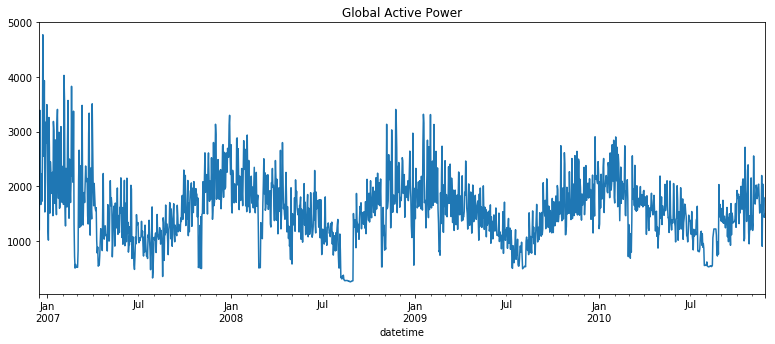

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

ax = plt.gca()

dataset['Global_active_power'].plot(figsize=(13, 5), title = 'Global Active Power', ax = ax)

plt.show()

In [12]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(dataset['Global_active_power'])

adf_test

(-3.697384667390318,
 0.004150091885223353,
 22,
 1419,
 {'1%': -3.434966750462565,
  '10%': -2.5678555388041384,
  '5%': -2.8635789736973725},
 20985.69197629365)

In [13]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(dataset['Global_active_power'])

kpss_test

/usr/local/lib/python2.7/site-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



(0.1912468661208363,
 0.1,
 24,
 {'1%': 0.739, '10%': 0.347, '2.5%': 0.574, '5%': 0.463})

In [7]:
import math
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls

train = dataset.loc["2007-07-01":"2009-06-30"].Global_active_power.values
test = dataset.loc["2009-07-01":"2010-06-30"].Global_active_power.values

train_log, test_log = np.log10(train), np.log10(test)
model_order = (1, 1, 1)
model_seasonal_order = (0, 1, 1, 12)

In [8]:
train.shape

(731,)

In [9]:
test.shape

(365,)

predicted=3.059754, expected=3.085769
predicted=3.072784, expected=3.094324
predicted=3.089421, expected=2.936588
predicted=3.016850, expected=3.092920
predicted=3.042550, expected=3.149446
predicted=3.086716, expected=2.979667
predicted=3.028774, expected=3.045376
predicted=3.042491, expected=3.091456
predicted=3.091158, expected=2.927500
predicted=3.020293, expected=3.076932
predicted=3.041828, expected=2.997372
predicted=3.015358, expected=2.710522
predicted=2.879802, expected=2.696134
predicted=2.830231, expected=2.959723
predicted=2.921112, expected=2.856169
predicted=2.887354, expected=2.777828
predicted=2.820713, expected=2.864397
predicted=2.848149, expected=2.985161
predicted=2.912565, expected=3.080498
predicted=2.974134, expected=2.821177
predicted=2.905110, expected=2.910497
predicted=2.931036, expected=2.868957
predicted=2.882120, expected=3.012837
predicted=2.936510, expected=2.749534
predicted=2.838488, expected=2.729722
predicted=2.818287, expected=2.734813
predicted=2.

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=2.975275, expected=2.889706
predicted=2.954008, expected=3.065111
predicted=2.998480, expected=3.189978
predicted=3.073288, expected=3.028046


/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.037138, expected=3.097692
predicted=3.054952, expected=2.974792
predicted=3.024491, expected=3.055587
predicted=3.065321, expected=2.874752
predicted=2.956861, expected=3.048769
predicted=2.994888, expected=3.142519
predicted=3.059154, expected=3.222285
predicted=3.125860, expected=3.102270
predicted=3.096122, expected=2.991464
predicted=3.064761, expected=3.087360
predicted=3.074703, expected=3.097322
predicted=3.076193, expected=3.010464
predicted=3.052771, expected=3.180087
predicted=3.103409, expected=3.089421
predicted=3.099696, expected=3.086879
predicted=3.105669, expected=3.035931
predicted=3.061852, expected=3.182227
predicted=3.104290, expected=3.046243
predicted=3.071832, expected=3.084271
predicted=3.086598, expected=3.314785
predicted=3.187351, expected=3.196456
predicted=3.189236, expected=3.197241
predicted=3.177455, expected=3.163402
predicted=3.157054, expected=3.241338
predicted=3.211623, expected=3.087578
predicted=3.127891, expected=3.137997
predicted=3.

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.173911, expected=3.105688
predicted=3.142870, expected=3.154865
predicted=3.148119, expected=3.260509
predicted=3.221296, expected=3.197877
predicted=3.184321, expected=3.130932
predicted=3.151514, expected=3.303791
predicted=3.233561, expected=3.287740
predicted=3.237125, expected=3.130849
predicted=3.194671, expected=3.161098
predicted=3.197821, expected=3.233307
predicted=3.212091, expected=3.173179
predicted=3.167801, expected=3.180945
predicted=3.181643, expected=3.438080
predicted=3.307951, expected=3.192055
predicted=3.224690, expected=3.136438
predicted=3.212109, expected=3.236237
predicted=3.219099, expected=3.294357
predicted=3.249142, expected=3.146038
predicted=3.200837, expected=3.244883
predicted=3.218554, expected=3.417373
predicted=3.321263, expected=3.381392
predicted=3.337249, expected=3.046239
predicted=3.185905, expected=3.047958
predicted=3.129426, expected=3.103362
predicted=3.151262, expected=3.296981
predicted=3.228060, expected=3.174164
predicted=3.

/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.287073, expected=3.259207
predicted=3.272832, expected=3.330173
predicted=3.306926, expected=3.254031
predicted=3.249360, expected=3.287828
predicted=3.289413, expected=3.144535
predicted=3.221256, expected=3.234816
predicted=3.243050, expected=3.241722
predicted=3.259269, expected=3.343277
predicted=3.286973, expected=3.058489
predicted=3.168749, expected=3.308557
predicted=3.260595, expected=3.276007
predicted=3.250572, expected=3.162923
predicted=3.224823, expected=3.463280
predicted=3.336567, expected=3.327900
predicted=3.309998, expected=3.339177
predicted=3.293454, expected=3.341524
predicted=3.322079, expected=3.320997
predicted=3.317800, expected=3.311323
predicted=3.315708, expected=3.389363
predicted=3.365540, expected=3.344764
predicted=3.331229, expected=3.087871
predicted=3.223497, expected=3.117028
predicted=3.209380, expected=3.318784


/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.266679, expected=3.205240
predicted=3.253603, expected=3.346310
predicted=3.295785, expected=3.249732
predicted=3.267098, expected=3.247836
predicted=3.237296, expected=3.254598
predicted=3.257148, expected=3.368640
predicted=3.306560, expected=3.399408
predicted=3.338499, expected=3.181467
predicted=3.273433, expected=3.300116
predicted=3.276368, expected=3.300116
predicted=3.285983, expected=3.325562
predicted=3.312293, expected=3.341783
predicted=3.307994, expected=3.332461
predicted=3.341494, expected=3.280250
predicted=3.304457, expected=3.274411
predicted=3.298488, expected=3.386233
predicted=3.316696, expected=3.371387
predicted=3.345570, expected=3.329978
predicted=3.333648, expected=3.253005
predicted=3.296710, expected=3.416695
predicted=3.375800, expected=3.355915
predicted=3.333188, expected=3.285672
predicted=3.312137, expected=3.315459


/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.330003, expected=3.441051
predicted=3.368104, expected=3.324331


/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.361440, expected=3.320767
predicted=3.339971, expected=3.453735
predicted=3.397568, expected=3.255079


/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.301187, expected=3.228857
predicted=3.293152, expected=3.333937
predicted=3.321643, expected=3.462849
predicted=3.383258, expected=3.364789
predicted=3.375871, expected=3.321990
predicted=3.327628, expected=3.433448
predicted=3.379659, expected=3.211043
predicted=3.310318, expected=3.411996
predicted=3.356726, expected=3.383983
predicted=3.384249, expected=3.289339
predicted=3.336421, expected=3.136647
predicted=3.257648, expected=3.277150
predicted=3.264891, expected=3.371355
predicted=3.327506, expected=3.227448
predicted=3.276469, expected=3.321626
predicted=3.304613, expected=3.254731
predicted=3.294714, expected=3.312719
predicted=3.286574, expected=3.245798
predicted=3.263116, expected=3.290829
predicted=3.297786, expected=3.297482
predicted=3.281617, expected=3.437800
predicted=3.369199, expected=3.168508


/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.261156, expected=3.164733
predicted=3.239027, expected=3.282005
predicted=3.250074, expected=3.274205
predicted=3.267785, expected=3.326368
predicted=3.295840, expected=3.246758
predicted=3.266636, expected=2.852276


/usr/local/lib/python2.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



predicted=3.107886, expected=3.113518
predicted=3.133554, expected=2.884742
predicted=3.029335, expected=2.971199
predicted=3.049925, expected=2.834344
predicted=2.955436, expected=3.054508
predicted=3.036514, expected=2.900210
predicted=2.964997, expected=3.137504
predicted=3.056830, expected=3.407747
predicted=3.174737, expected=3.245540
predicted=3.174614, expected=3.260699
predicted=3.200734, expected=3.290277
predicted=3.218055, expected=3.216278
predicted=3.226765, expected=3.377126
predicted=3.264304, expected=3.194990
predicted=3.216048, expected=3.253302
predicted=3.251204, expected=3.188267
predicted=3.215983, expected=3.303008
predicted=3.270080, expected=3.193871
predicted=3.228597, expected=3.220993
predicted=3.242165, expected=3.222868
predicted=3.211969, expected=3.250700
predicted=3.241385, expected=3.209137
predicted=3.227547, expected=3.260587
predicted=3.233611, expected=3.299889
predicted=3.283642, expected=3.225279
predicted=3.220975, expected=3.217822
predicted=3.

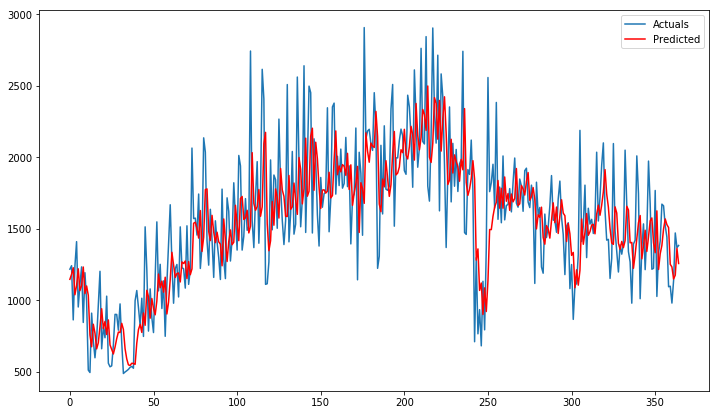

In [11]:
history = [x for x in train_log]
predictions = list()
predict_log=list()
for t in range(len(test_log)):
#     model = sm.tsa.ARIMA(history, order=model_order)
    model = sm.tsa.SARIMAX(history, order=model_order, seasonal_order=model_seasonal_order, enforce_stationarity=False,enforce_invertibility=False)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predict_log.append(output[0])
    yhat = 10**output[0]
    predictions.append(yhat)
    obs = test_log[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (output[0], obs))
error = math.sqrt(mean_squared_error(test_log, predict_log))
print('Test rmse: %.3f' % error)
# plot
figsize=(12, 7)
plt.figure(figsize=figsize)
pyplot.plot(test,label='Actuals')
pyplot.plot(predictions, color='red',label='Predicted')
pyplot.legend(loc='upper right')
pyplot.show()

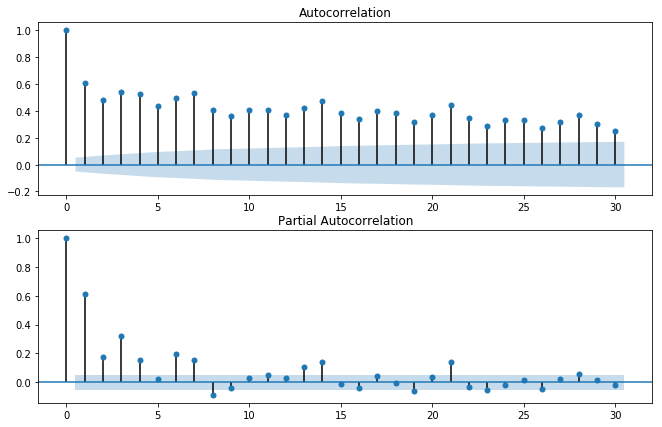

In [14]:
# acf and pacf plots of total power
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

#We can calculate the correlation for time series observations with the use of obervations of lags. 
#We can then create a single figure that contains both an ACF and a PACF plot. 
#The number of lag time steps can be specified, in our case we fix it to 365 days of observations (365 days).
#The ACF plot indicates that there is a strong autocorrelation component,
#The PACF plot indicates that this component is distinct for the approximatelly 1 lag of observations.

# plots
pyplot.figure(figsize=(11,7))
lags = 30 #365 
# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(dataset['Global_active_power'], ax=axis, lags=lags)
# pacf
axis = pyplot.subplot(2, 1, 2)
plot_pacf(dataset['Global_active_power'], ax=axis, lags=lags)
# show plot
pyplot.show()

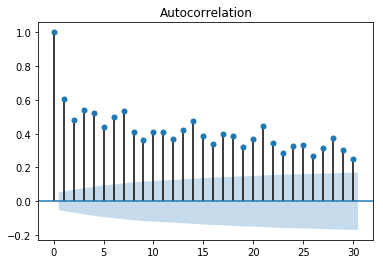

In [15]:
from statsmodels.graphics.tsaplots import plot_acf

#Since the plots above are quite dense, we can and change the number of lag observations 
#from 365 to 30 to zoom in the plot.
#We can see that a good starting point would be an autoregressive model with 1 lag obervations used as a parameter.

lags = 30

plot_acf(dataset['Global_active_power'], lags=lags)
plt.show()

In [10]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(train_log, start_p=0, start_q=0,
                           max_p=10, max_q=10, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

#about parameters: http://www.alkaline-ml.com/pmdarima/0.9.0/modules/generated/pyramid.arima.auto_arima.html

/usr/local/lib/python2.7/site-packages/pyramid/__init__.py:68: UserWarning:


    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    



Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-692.403, BIC=-678.673, Fit time=1.873 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-213.556, BIC=-204.403, Fit time=0.135 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-568.245, BIC=-549.939, Fit time=1.319 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-872.761, BIC=-854.455, Fit time=3.161 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-872.115, BIC=-849.232, Fit time=5.025 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-400.261, BIC=-386.531, Fit time=0.256 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-872.016, BIC=-849.134, Fit time=10.308 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-868.762, BIC=-841.303, Fit time=16.350 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-881.309, BIC=-858.426, Fit time=5.032 seconds
Fit ARIMA: order=(1, 1, 0)

In [11]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_log,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param,param_seasonal,results.aic))
        except: 
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3755.48140601
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2797.59061273
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-197.608671642
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-333.202779612
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-197.277072148
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-339.892666544
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-282.477292162
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-352.536209765
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2801.60627923
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1964.26869648
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-357.566144764
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-566.720894127
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-358.512207041
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-575.686055094
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:-491.876109824
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:-563.929805516
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:-761.925975027
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:-743.437637411
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:-215.540159415
ARIMA(0, 1, 0)x(

In [ ]:
#ignore the code below

In [74]:
# from statsmodels.tsa.arima_model import ARMAResults

# #Running this prints a summary of the fit model. 
# #This summarizes the coefficient values used as BIC and AIC values.

# print(ARMAResults.summary(model_fit))

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

# #cross validation

# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# tscv = TimeSeriesSplit(n_splits = 3)
# rmse = []
# predictions = list()

# for train_index, test_index in tscv.split(train):
#     cv_train, cv_test = train[train_index], train[test_index]

#     for t in range(len(train)-1):
#         c = ARIMA(train[t], order=(1,0,0)).fit(disp=False)
#         yhat = model.predict(len(train[t]), len(train[t])+6)
#         predictions.append(yhat)
#         rmse.append(mean_squared_error(train[t+1], yhat))
        
# print("rmse score: {}".format(np.mean(rmse)))

In [ ]:
# from plotly.offline import plot_mpl
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(dataset['Global_active_power'], model='multiplicative')
# fig = result.plot()
# plot_mpl(fig)